In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

!pip install opendatasets --upgrade --quiet
import opendatasets as od


В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [2]:
dataset_url = "https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-4/data?select=train.csv"

In [3]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kirillgermat
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 746MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-4/bank-customer-churn-prediction-dlu-course-c-4.zip to ./bank-customer-churn-prediction-dlu-course-c-4


In [4]:
import os

In [5]:
data_dir = 'bank-customer-churn-prediction-dlu-course-c-4'

In [6]:
!ls


bank-customer-churn-prediction-dlu-course-c-4  sample_data


In [7]:
os.listdir(data_dir)

['sample_submission.csv', 'test.csv', 'train.csv']

In [8]:
train_path = data_dir + '/train.csv'
test_path = data_dir + '/test.csv'
sample_sub_path = data_dir + '/sample_submission.csv'

train_raw_df = pd.read_csv(train_path)
test_raw_df = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_sub_path)


In [9]:
train_raw_df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
5,5,15781598.0,Hsieh,602.0,Spain,Male,33.0,1.0,120599.38,1.0,0.0,1.0,72950.14,0.0
6,6,15763093.0,Kao,739.0,France,Female,36.0,1.0,0.00,1.0,1.0,1.0,134626.30,0.0
7,7,15631715.0,Hargreaves,763.0,Spain,Male,28.0,2.0,0.00,2.0,1.0,0.0,19283.14,0.0
8,8,15632275.0,Hs?,620.0,Germany,Female,56.0,4.0,113743.37,1.0,1.0,0.0,121440.80,1.0
9,9,15577598.0,Chukwuemeka,525.0,France,Female,34.0,4.0,0.00,2.0,1.0,1.0,160670.58,0.0


In [10]:
test_raw_df.head(10)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
5,15005,15759066.0,Genovesi,611.0,France,Male,36.0,7.0,61811.23,1.0,1.0,0.0,145796.49
6,15006,15754926.0,Haddon,684.0,France,Female,36.0,0.0,0.00,2.0,1.0,0.0,161671.15
7,15007,15664802.0,Chiang,588.0,France,Male,39.0,4.0,0.00,2.0,0.0,0.0,57862.88
8,15008,15757537.0,Iweobiegbulam,612.0,Germany,Male,27.0,3.0,155413.06,2.0,1.0,0.0,140166.95
9,15009,15674928.0,Hoolan,736.0,France,Female,32.0,8.0,0.00,2.0,1.0,0.0,75969.19


In [11]:
train_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [12]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [13]:
train_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_val_df, test_df = train_test_split(train_raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (9000, 14)
val_df.shape : (3000, 14)
test_df.shape : (3000, 14)


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [16]:
target_col = 'Exited'

X = train_raw_df.drop(columns=[target_col])
y = train_raw_df[target_col]

In [17]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(train_raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

target_col = 'Exited'

# Вхідні колонки
input_cols = [
    'CreditScore',
    'Geography',
    'Gender',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary'
]

# TRAIN
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

# VALIDATION
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# TEST
test_inputs = test_df[input_cols]

print("Train inputs:", train_inputs.shape)
print("Train targets:", train_targets.shape)

print("Val inputs:", val_inputs.shape)
print("Val targets:", val_targets.shape)

print("Test inputs:", test_inputs.shape)



train_df.shape : (9000, 14)
val_df.shape : (3000, 14)
test_df.shape : (3000, 14)
Train inputs: (9000, 10)
Train targets: (9000,)
Val inputs: (3000, 10)
Val targets: (3000,)
Test inputs: (3000, 10)


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [18]:
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)



Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Categorical columns: ['Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [19]:
train_raw_df.dropna(subset=['id', 'CustomerId', 'Surname'], inplace=True)

train_raw_df.shape

(15000, 14)

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

drop_cols = ['CustomerId', 'Surname', 'id']

train_inputs = train_inputs.drop(columns=drop_cols, errors='ignore')
val_inputs = val_inputs.drop(columns=drop_cols, errors='ignore')

num_imputer = SimpleImputer(strategy='median')

train_inputs[numeric_cols] = num_imputer.fit_transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = num_imputer.transform(val_inputs[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')

train_inputs[categorical_cols] = cat_imputer.fit_transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = cat_imputer.transform(val_inputs[categorical_cols])

scaler = StandardScaler()

train_inputs[numeric_cols] = scaler.fit_transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train = encoder.fit_transform(train_inputs[categorical_cols])
encoded_val = encoder.transform(val_inputs[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_cols, index=train_inputs.index)
encoded_val_df = pd.DataFrame(encoded_val, columns=encoded_cols, index=val_inputs.index)

train_inputs = train_inputs.drop(columns=categorical_cols)
val_inputs = val_inputs.drop(columns=categorical_cols)

train_inputs = pd.concat([train_inputs, encoded_train_df], axis=1)
val_inputs = pd.concat([val_inputs, encoded_val_df], axis=1)

display(train_inputs.head())
display(val_inputs.head())


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2976,-0.315149,0.031355,-1.445539,-0.716794,0.768112,0.521445,1.025663,0.521256,1.0,0.0,0.0,0.0,1.0
7730,-0.232270,-0.213076,-0.728387,1.295379,-1.103303,0.521445,-0.974980,0.960970,0.0,1.0,0.0,0.0,1.0
8892,0.486006,0.886864,-1.445539,-0.716794,0.768112,0.521445,1.025663,-0.220623,1.0,0.0,0.0,0.0,1.0
12260,0.292624,0.275786,-0.369811,-0.716794,-1.103303,0.521445,1.025663,0.642446,1.0,0.0,0.0,1.0,0.0
3191,0.983275,1.375727,-0.369811,1.318734,-1.103303,0.521445,-0.974980,1.224865,0.0,1.0,0.0,1.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2651,0.513632,0.275786,0.705916,-0.716794,-1.103303,0.521445,1.025663,-0.074419,1.0,0.0,0.0,0.0,1.0
1096,-0.107953,-0.213076,-0.728387,1.122538,0.768112,0.521445,1.025663,-0.681976,1.0,0.0,0.0,1.0,0.0
4605,-0.867669,1.986805,0.347340,0.942327,-1.103303,0.521445,1.025663,0.785922,1.0,0.0,0.0,0.0,1.0
6525,0.720827,0.642433,1.781644,0.653480,-1.103303,-1.917747,1.025663,-0.839786,0.0,0.0,1.0,0.0,1.0
5681,-0.259896,-1.801879,-0.728387,-0.716794,-1.103303,0.521445,1.025663,0.609224,1.0,0.0,0.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [21]:
import os

save_dir = 'processed_data'

os.makedirs(save_dir, exist_ok=True)

train_inputs.to_parquet(os.path.join(save_dir, 'train_inputs.parquet'))
train_targets.to_frame().to_parquet(os.path.join(save_dir, 'train_targets.parquet'))

val_inputs.to_parquet(os.path.join(save_dir, 'val_inputs.parquet'))
val_targets.to_frame().to_parquet(os.path.join(save_dir, 'val_targets.parquet'))

print("Файли в папці:")
print(os.listdir(save_dir))


Файли в папці:
['val_inputs.parquet', 'val_targets.parquet', 'train_inputs.parquet', 'train_targets.parquet']


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [22]:
from sklearn.linear_model import LogisticRegression

X_train = train_inputs.copy()
X_val = val_inputs.copy()

y_train = train_targets
y_val = val_targets

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

print("Train accuracy:", train_score)
print("Validation accuracy:", val_score)


X_train shape: (9000, 13)
X_val shape: (3000, 13)
Train accuracy: 0.8727777777777778
Validation accuracy: 0.8693333333333333


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

Confusion Matrix - TRAIN
[[6871  302]
 [ 843  984]]

Confusion Matrix - VALIDATION
[[2294  110]
 [ 282  314]]


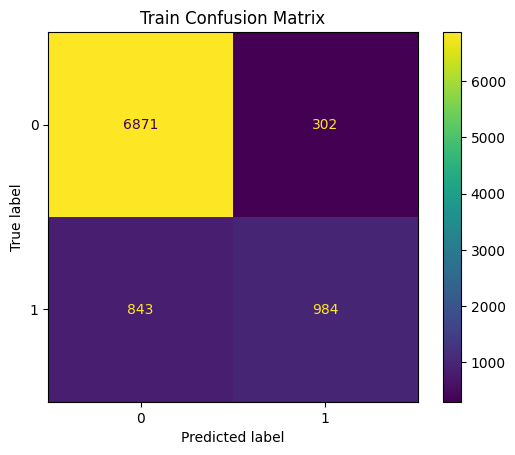

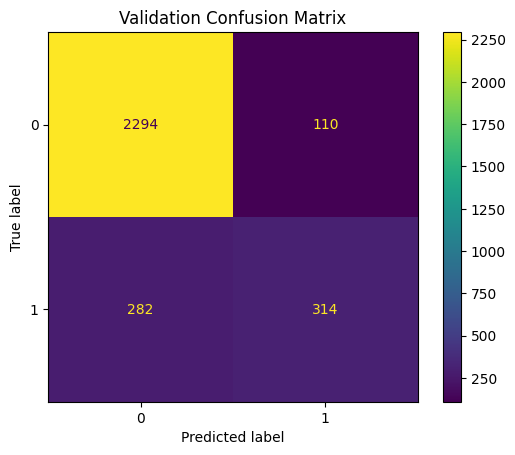

Train AUROC: 0.8829321870900205
Validation AUROC: 0.876271650158014


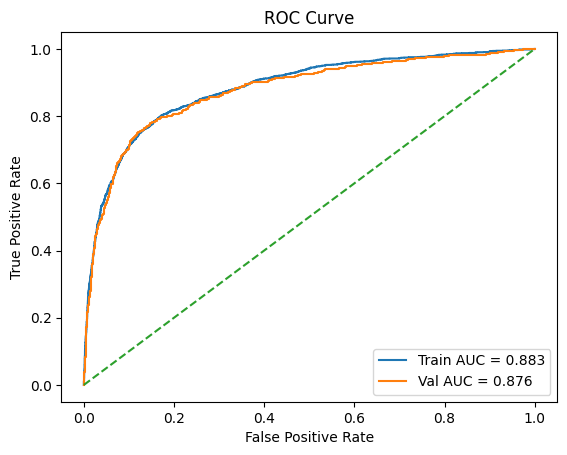

Train F1: 0.6321876003854803
Validation F1: 0.615686274509804


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt

# Ймовірності класу 1
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

# Передбачення при порозі 0.5
train_preds = (train_probs >= 0.5).astype(int)
val_preds = (val_probs >= 0.5).astype(int)

# -------------------------------
# Confusion Matrix
# -------------------------------
cm_train = confusion_matrix(y_train, train_preds)
cm_val = confusion_matrix(y_val, val_preds)

print("Confusion Matrix - TRAIN")
print(cm_train)

print("\nConfusion Matrix - VALIDATION")
print(cm_val)

# Візуалізація
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Train Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(cm_val).plot()
plt.title("Validation Confusion Matrix")
plt.show()

# -------------------------------
# ROC Curve + AUROC
# -------------------------------
train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

print("Train AUROC:", train_auc)
print("Validation AUROC:", val_auc)

fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
fpr_val, tpr_val, _ = roc_curve(y_val, val_probs)

plt.plot(fpr_train, tpr_train, label=f"Train AUC = {train_auc:.3f}")
plt.plot(fpr_val, tpr_val, label=f"Val AUC = {val_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# -------------------------------
# F1 Score
# -------------------------------
train_f1 = f1_score(y_train, train_preds)
val_f1 = f1_score(y_val, val_preds)

print("Train F1:", train_f1)
print("Validation F1:", val_f1)


8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score

# який клас зустрічається частіше?
majority_class = y_train.value_counts().idxmax()
print("Majority class:", majority_class)

# baseline передбачення
train_preds_base = np.full(len(y_train), majority_class)
val_preds_base = np.full(len(y_val), majority_class)

train_acc_base = accuracy_score(y_train, train_preds_base)
val_acc_base = accuracy_score(y_val, val_preds_base)

print("Baseline Train Accuracy:", train_acc_base)
print("Baseline Val Accuracy:", val_acc_base)

# передбачення моделі
train_preds_model = model.predict(X_train)
val_preds_model = model.predict(X_val)

train_acc_model = accuracy_score(y_train, train_preds_model)
val_acc_model = accuracy_score(y_val, val_preds_model)

print("Model Train Accuracy:", train_acc_model)
print("Model Val Accuracy:", val_acc_model)

print("\n--- COMPARISON ---")
print(f"Baseline Val Accuracy: {val_acc_base:.4f}")
print(f"Model Val Accuracy:    {val_acc_model:.4f}")


Majority class: 0.0
Baseline Train Accuracy: 0.797
Baseline Val Accuracy: 0.8013333333333333
Model Train Accuracy: 0.8727777777777778
Model Val Accuracy: 0.8693333333333333

--- COMPARISON ---
Baseline Val Accuracy: 0.8013
Model Val Accuracy:    0.8693


9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [25]:
import joblib

joblib.dump({
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}, 'log_reg.joblib')

loaded = joblib.load('log_reg.joblib')

model_2 = loaded['model']
scaler = loaded['scaler']
encoder = loaded['encoder']
numeric_cols = loaded['numeric_cols']
categorical_cols = loaded['categorical_cols']
encoded_cols = loaded['encoded_cols']


10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [26]:
import warnings
warnings.filterwarnings('ignore')

def predict_raw_df(model, scaler, encoder, numeric_cols, categorical_cols, encoded_cols, input_df):

    df = input_df.copy()

    # масштабування числових
    df[numeric_cols] = scaler.transform(df[numeric_cols])

    # кодування категоріальних
    encoded = encoder.transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

    # обʼєднання
    X_input = pd.concat([df[numeric_cols], encoded_df], axis=1)

    # ймовірності класу 1
    probs = model.predict_proba(X_input)[:, 1]

    return probs


In [38]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, train_raw_df[:5])

TypeError: predict_raw_df() missing 2 required positional arguments: 'encoded_cols' and 'input_df'

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [34]:
test_raw_df = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-4/test.csv')

test_probs = predict_raw_df(
    model_2,
    scaler,
    encoder,
    numeric_cols,
    categorical_cols,
    encoded_cols,
    test_raw_df
)

test_raw_df['Exited'] = test_probs


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [37]:
sample_submission = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-4/sample_submission.csv')

sample_submission['Exited'] = test_probs

display(sample_submission.head())

sample_submission.to_csv('submission_log_reg.csv', index=False)



,id,Exited
0,15000,0.075992
1,15001,0.030708
2,15002,0.148018
3,15003,0.208578
4,15004,0.047648
